In [3]:
import torch
import random
from d2l import torch as d2l

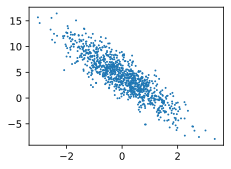

In [5]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1);

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4155,  0.4952],
        [-0.5073, -0.1149],
        [ 0.5748, -0.2737],
        [ 0.5191, -0.0903],
        [ 0.0089, -0.5377],
        [ 0.2504, -1.3077],
        [-1.4682,  1.9280],
        [ 0.5607, -0.6188],
        [ 0.0210,  0.7862],
        [ 0.1249, -1.5123]]) 
 tensor([[ 3.3594],
        [ 3.5793],
        [ 6.2762],
        [ 5.5429],
        [ 6.0336],
        [ 9.1471],
        [-5.2988],
        [ 7.4220],
        [ 1.5664],
        [ 9.6013]])


In [11]:
w = torch.normal(0, 0.01, size = (2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [13]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [17]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean())}')

epoch 1, loss 0.03793356567621231
epoch 2, loss 0.0001427414536010474
epoch 3, loss 5.01199574500788e-05
